In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [285]:
url='https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df=pd.read_csv(url)
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# **Задание 1**

**Постройте Диаграмму разброса (точечный график) от двух переменных: Age и Income.**

In [286]:
#ID	Sex	Marital status	Age	Education	Income	Occupation	Settlement size
Age =df['Age']
Income =df['Income']
Sex=df['Sex']
Marital_status=df['Marital status']
ID=df['ID']
Occupation=df['Occupation']
Settlement_size=df['Settlement size']

Text(0, 0.5, 'Income')

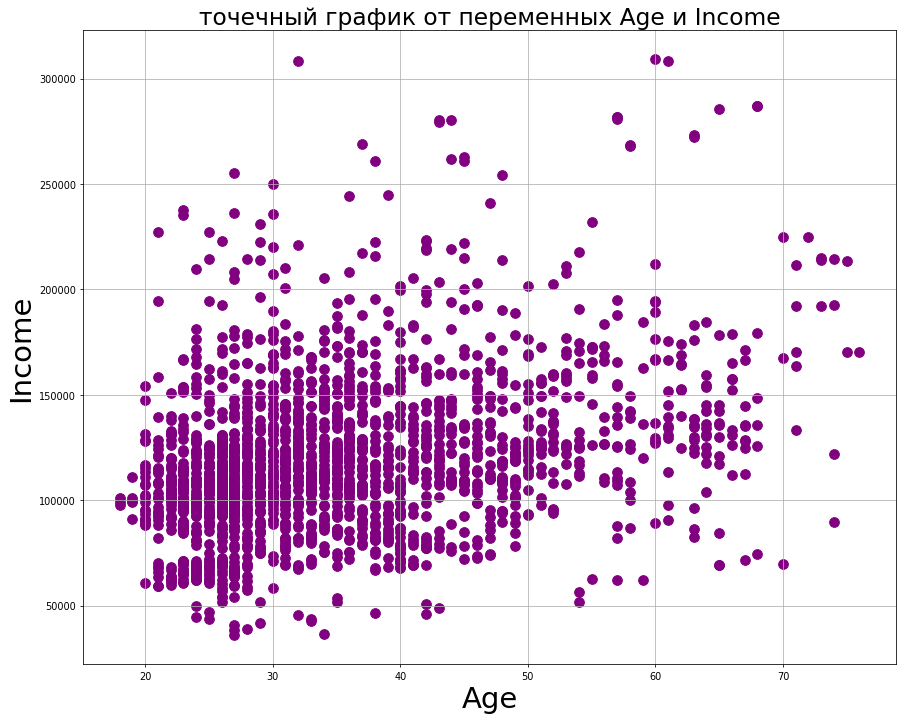

In [287]:
plt.figure(figsize=(15, 12), dpi=70)
plt.title('точечный график от переменных Age и Income',fontsize=24)
plt.grid()
plt.scatter(Age,Income, s=100,c='purple')
plt.xlabel('Age',fontsize=30)
plt.ylabel('Income',fontsize=30)


In [288]:
#по графику нельзя определить зависимость между зарплатой клиента и его возрастом.

**Построить график анализа пропущенных значений.**

Text(0.5, 6.79999999999999, 'count')

<Figure size 720x432 with 0 Axes>

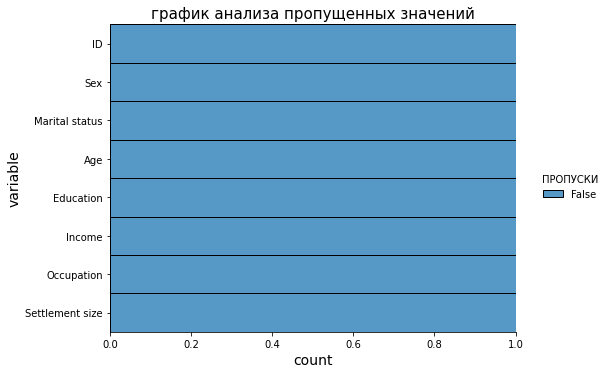

In [289]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="ПРОПУСКИ"),
    y="variable",
    hue="ПРОПУСКИ",
    multiple="fill",
    aspect=1.5
)
plt.title('график анализа пропущенных значений',fontsize=15)
plt.ylabel('variable',fontsize=14)
plt.xlabel('count',fontsize=14)

In [290]:
#по графику видно, что пропущенных значений нет.

**Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Income')

<Figure size 7200x7200 with 0 Axes>

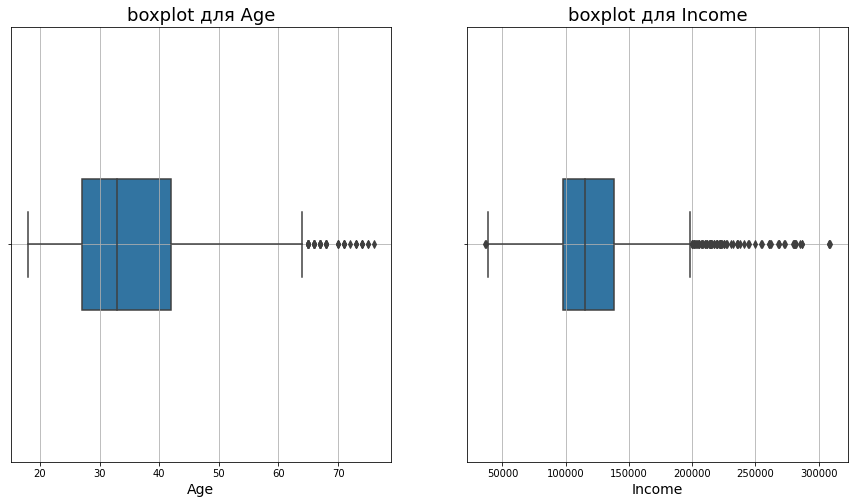

In [291]:
plt.figure(figsize=(100,100))
fig, axes = plt.subplots(1, 2, figsize=(15,8))  

#числовые переменные - Age и Income (остальные либо 0 или 1, либо 0 или 1 или 2)
sns.boxplot(df['Age'], ax=axes[0], width=0.3)
axes[0].set_title("boxplot для Age",fontsize=18)
axes[0].grid()
axes[0].set_xlabel("Age", fontsize=14)

sns.boxplot(df['Income'], ax=axes[1], width=0.3)
axes[1].set_title("boxplot для Income",fontsize=18)
axes[1].grid()
axes[1].set_xlabel("Income", fontsize=14)

In [292]:
#на boxplot можно выделить клиентов с зарплатой больше 200 000 и меньше 30 000,а также можно выделить клиентов старше 63(приблизительно).

**Построить barplot по переменной Sex.**

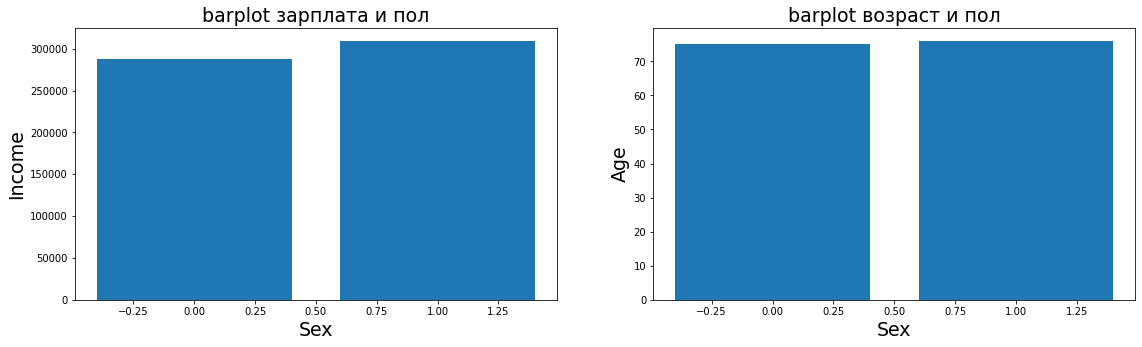

In [293]:
fig, ax = plt.subplots(1, 2, figsize=(19,5))
x=df['Sex']
y1=df['Income']
y2=df['Age']
ax[0].bar(x, y1)
ax[1].bar(x, y2)
ax[0].set_xlabel("Sex", fontsize=19)
ax[1].set_xlabel("Sex", fontsize=19)
ax[0].set_ylabel("Income", fontsize=19)
ax[1].set_ylabel("Age", fontsize=19)
ax[0].set_title("barplot зарплата и пол",fontsize=19)
ax[1].set_title("barplot возраст и пол",fontsize=19)

plt.show()

In [295]:
# по графику можно сказать, что зарплата клиентов пола "1" превышает зарплату клиентов пола "0", также возраст представителей пола "1" выше(не сильно), чем у представителей пола "0"

**Построить матрицу корреляции для всех переменных.**

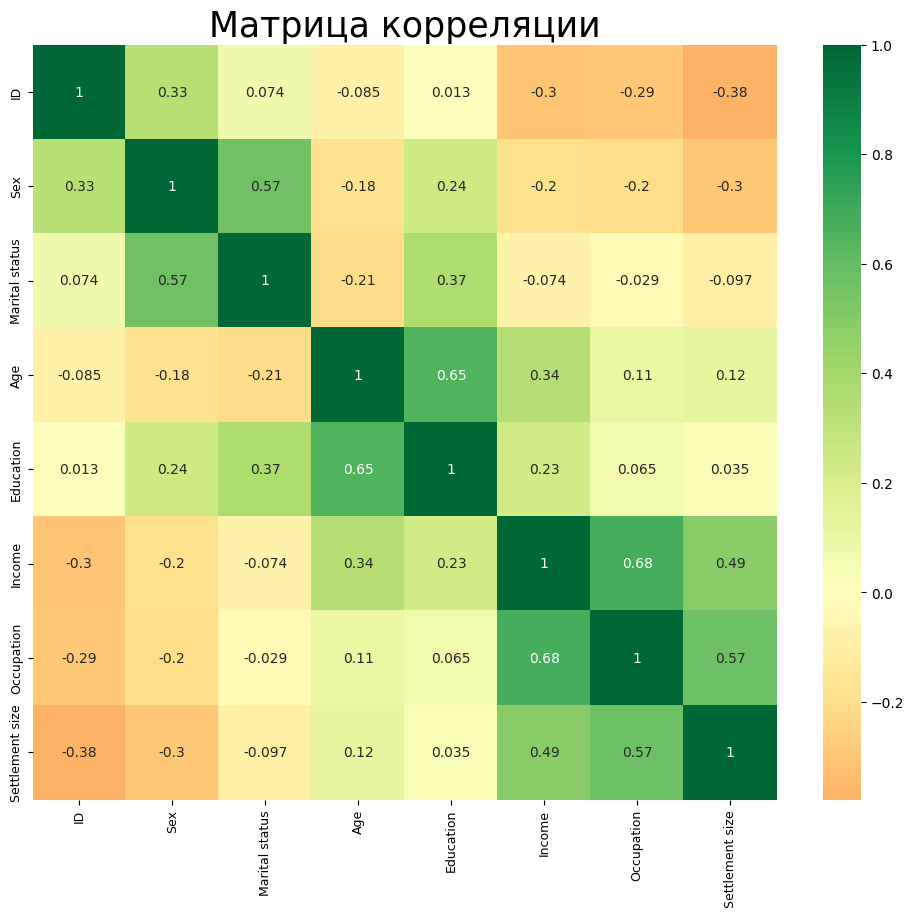

In [294]:
df.corr()
plt.figure(figsize=(12,10), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=25)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [114]:
#матрица показывает, что наибольшая зависимость между профессией и зарплатой 0.68
#также можно отметить довольно большие зависимости между образованием и возрастом 0.65 ,а также полом и семейным положением 0.57.

# **Задание 2**


Реализовать метод кластарезации KMeans:

Методом локтя и силуета (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.


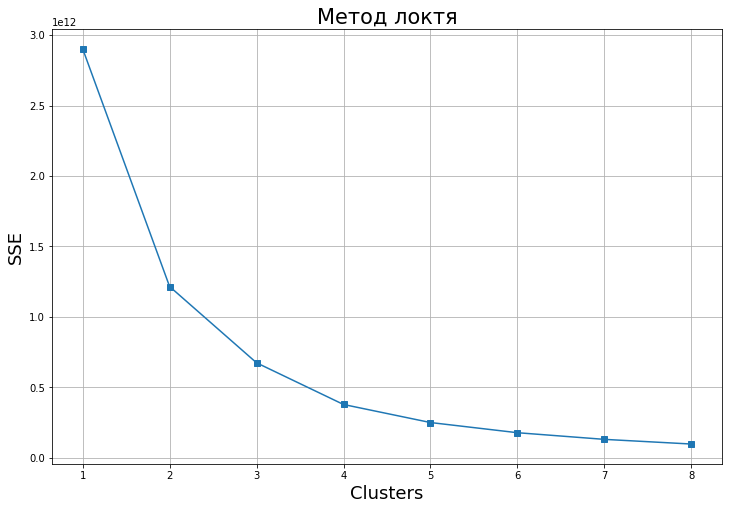

In [296]:
from sklearn.cluster import KMeans

#ID,Sex,Marital status,	Age,	Education	Income,	Occupation,	Settlement size.
df = df.loc[:, ["ID", "Sex", "Marital status", "Age", "Education", "Income", "Occupation", "Settlement size"]]

SSE = []
plt.figure(figsize=(12, 8))
plt.title("Метод локтя", fontsize = 21)
for k in range(1, 9):
  kmeans = KMeans(n_clusters = k);
  kmeans.fit(df)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,9), SSE, marker="s")
plt.xlabel("Clusters", fontsize = 18)
plt.ylabel("SSE", fontsize = 18)
plt.grid()
plt.show()

In [116]:
#по графику видно, что за оптимальное количество кластеров k можно взять 4.

In [297]:
X = df.loc[:,['Age','Income']]

from sklearn.cluster import KMeans

n=4

kmeans = KMeans(n_clusters=n)


kmeans.fit(X)


Y_pred = kmeans.labels_
Y_pred

array([0, 3, 2, ..., 2, 0, 2], dtype=int32)

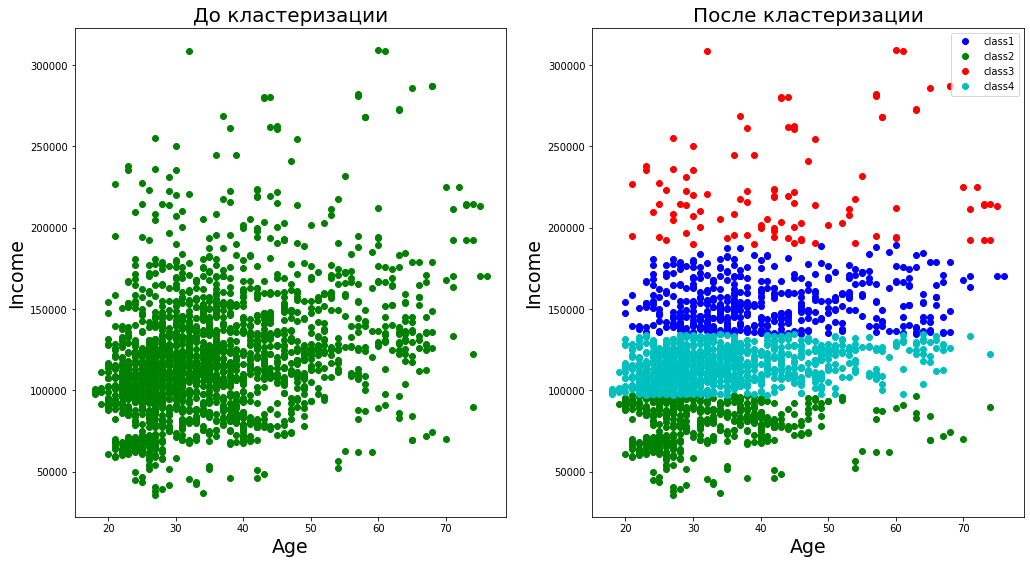

In [298]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(17,9))

axes[0].plot(df['Age'], df['Income'], 'go')
axes[0].set_xlabel('Age',fontsize=19)
axes[0].set_ylabel('Income',fontsize=19)
axes[0].set_title("До кластеризации",fontsize=20)

axes[1].plot(df[df['cluster']==0]['Age'], df[df['cluster']==0]['Income'], 'bo', label='class1')

axes[1].plot(df[df['cluster']==1]['Age'], df[df['cluster']==1]['Income'], 'go', label='class2')

axes[1].plot(df[df['cluster']==2]['Age'], df[df['cluster']==2]['Income'], 'ro', label='class3')

axes[1].plot(df[df['cluster']==3]['Age'], df[df['cluster']==3]['Income'], 'co', label='class4')

axes[1].set_xlabel('Age',fontsize=19)
axes[1].set_ylabel('Income',fontsize=19)
axes[1].set_title("После кластеризации",fontsize=20)
plt.legend(loc=0)
plt.show()

In [300]:
X['cluster'] = Y_pred
X

,Age,Income,cluster
0,67,124670,0
1,22,150773,3
2,49,89210,2
3,45,171565,3
4,53,149031,3
...,...,...,...
1995,47,123525,0
1996,27,117744,0
1997,31,86400,2
1998,24,97968,0


# **Задание 3**

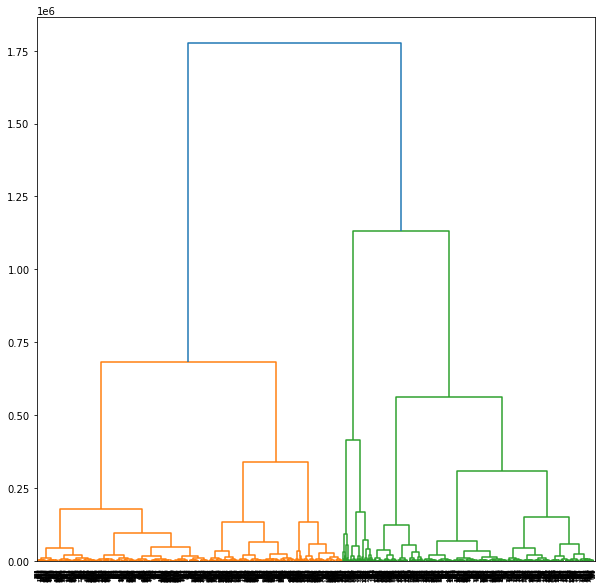

In [301]:
X = df.iloc[:,:-1]
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)